# Career Change Prediction

To predict whether individuals are more likely or not to change their occupation based on their academic background, job experience, and other demographic factors.



Load data.

In [62]:
data_path = '/content/drive/MyDrive/IT7133/Project/career_change_prediction_dataset.csv'

In [179]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#load data with pandas
import pandas as pd
data = pd.read_csv(data_path)

#train test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
train_data

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
20513,Mechanical Engineering,Lawyer,50,Male,1,Bachelor's,Medium,7,10,39,...,5,Low,0,1,0,0,3,2,9,1
36033,Business,Lawyer,22,Female,14,High School,Medium,5,10,46,...,2,NaN,1,1,0,0,1,1,7,0
6361,Education,Economist,25,Male,16,PhD,Medium,9,2,46,...,6,Medium,1,0,1,0,9,1,7,0
33579,Education,Mechanical Engineer,57,Female,36,High School,Low,10,7,53,...,6,High,1,0,0,1,10,0,4,1
10058,Economics,Doctor,52,Male,29,Master's,High,10,9,52,...,6,High,0,1,0,0,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20392,Arts,Mechanical Engineer,22,Female,23,Bachelor's,Medium,4,5,49,...,6,Low,0,0,0,1,9,0,6,1
38310,Economics,Biologist,26,Male,13,PhD,Medium,7,3,12,...,4,High,0,0,0,0,2,2,1,0
18896,Arts,Psychologist,26,Female,33,Bachelor's,Medium,3,4,5,...,1,High,0,1,0,0,2,1,4,1
34026,Law,Mechanical Engineer,21,Female,10,High School,Low,10,3,75,...,8,Low,1,0,0,0,1,1,2,1


### Data Visualization


In [108]:
num_cols = [
    "Age",
    "Years of Experience",
    "Job Opportunities",
    "Salary",
    "Career Change Events"
]

cat_cols = [
    "Field of Study",
    "Current Occupation",
    "Gender",
    "Education Level",
    "Industry Growth Rate",
    "Job Satisfaction",
    "Work-Life Balance",
    "Job Security",
    "Career Change Interest",
    "Skills Gap",
    "Family Influence",
    "Mentorship Available",
    "Certifications",
    "Freelancing Experience",
    "Geographic Mobility",
    "Professional Networks",
    "Technology Adoption",
    "Likely to Change Occupation"
]


### Histograms for Numeric Columns

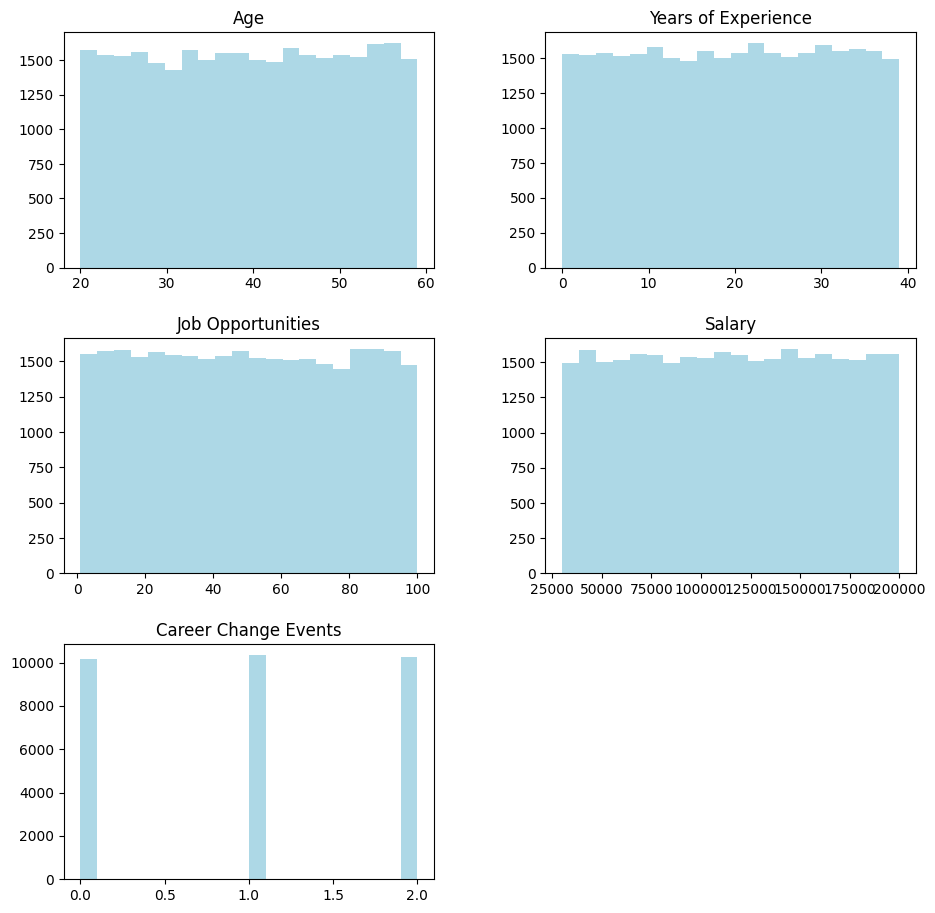

In [109]:
import matplotlib.pyplot as plt
train_data[num_cols].hist(bins=20, figsize=(11,11), color='lightblue', grid=False)
plt.show()

### Bar charts for Categorical Columns

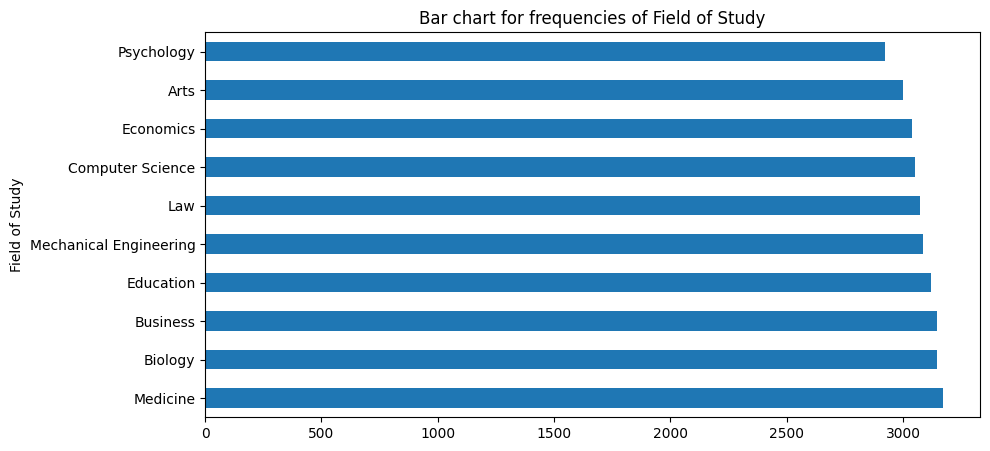

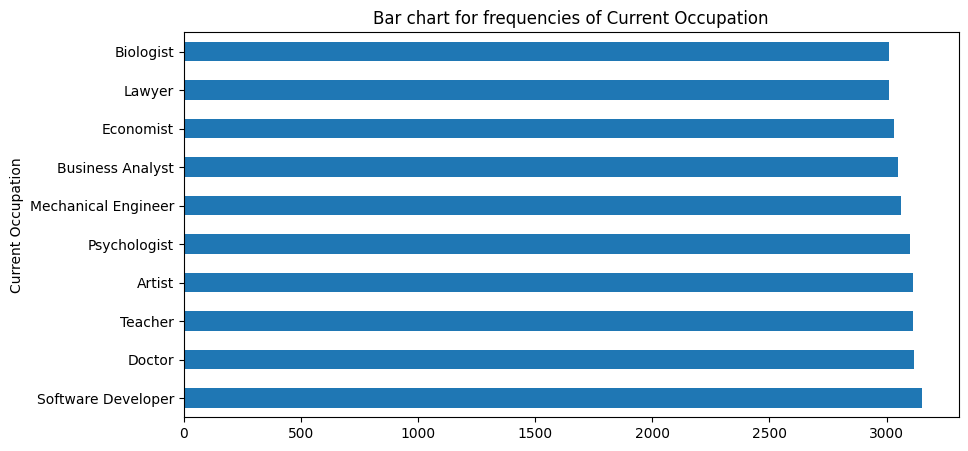

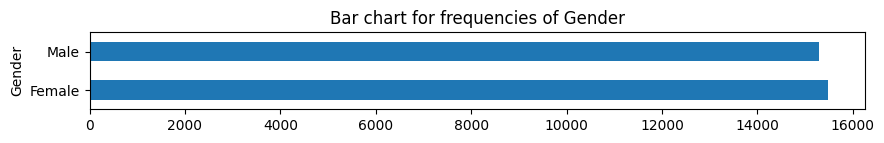

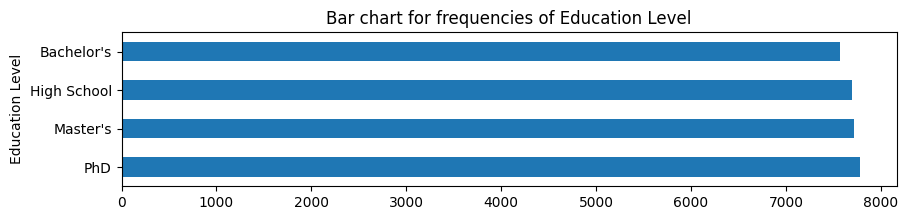

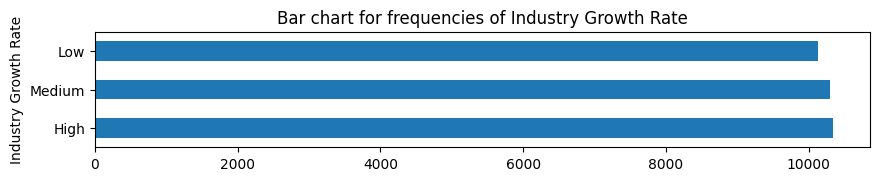

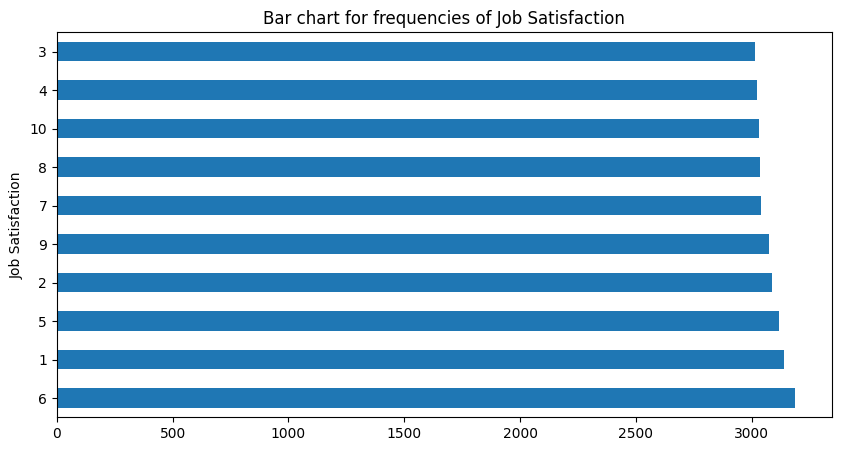

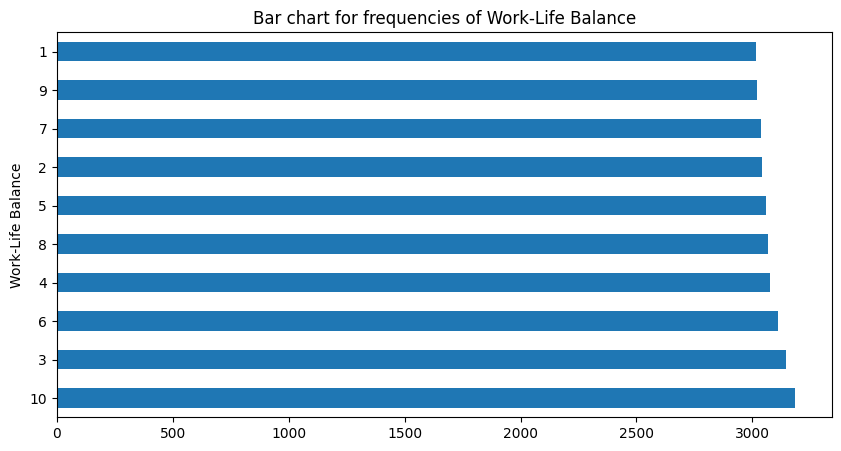

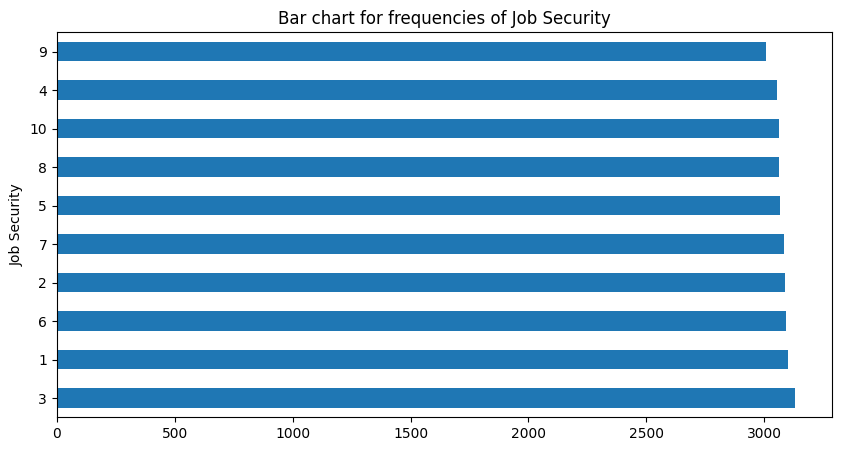

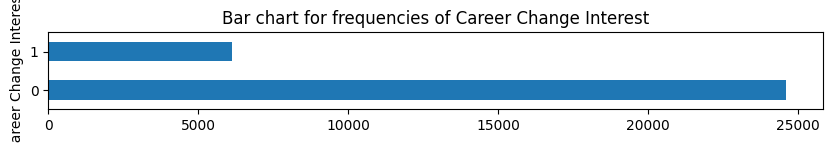

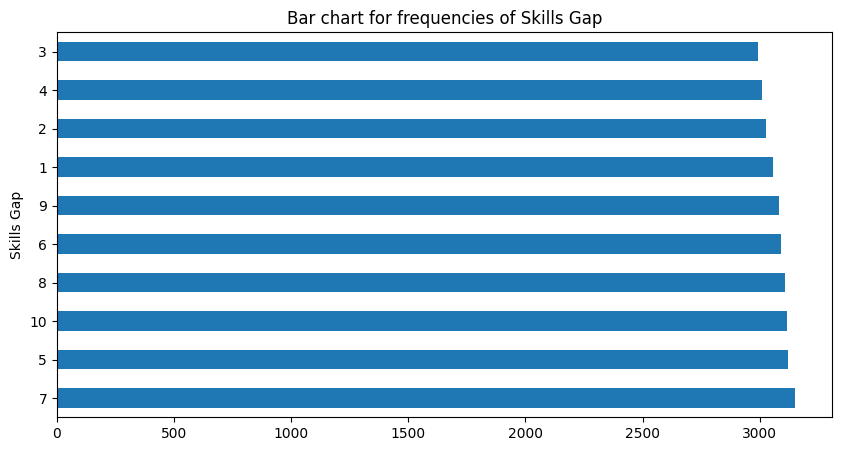

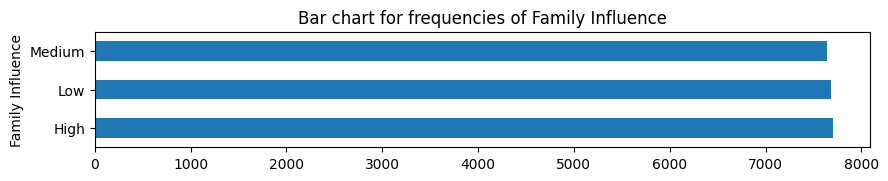

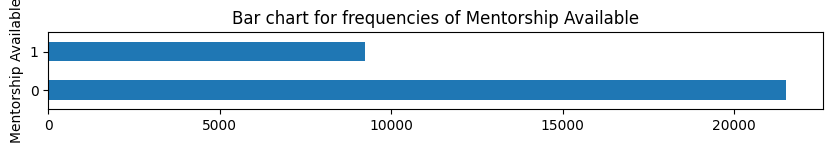

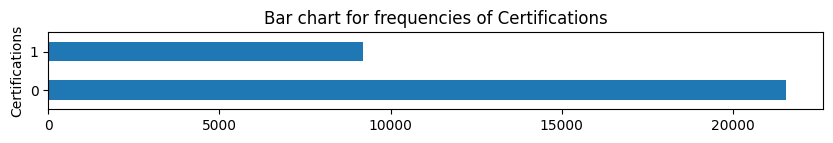

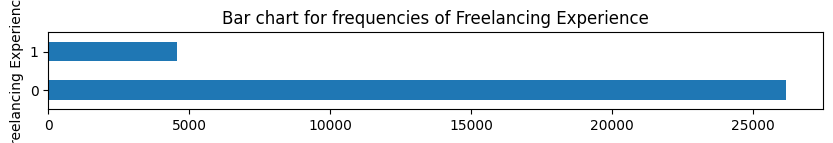

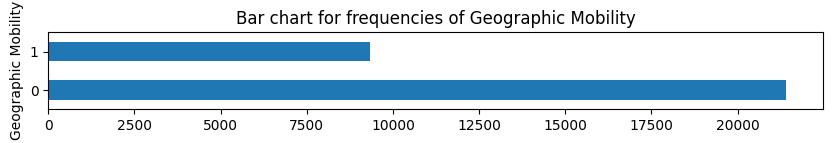

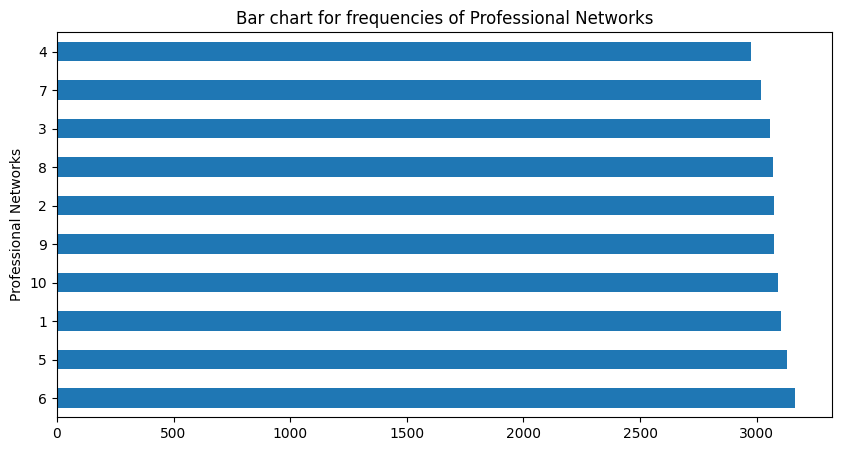

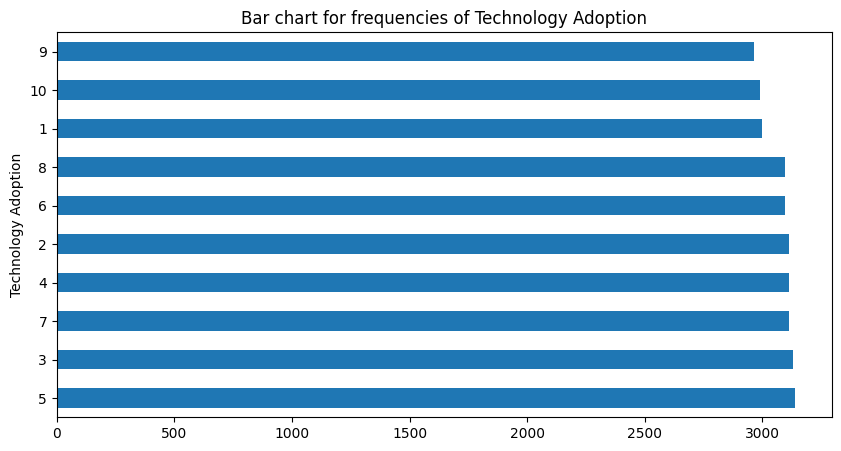

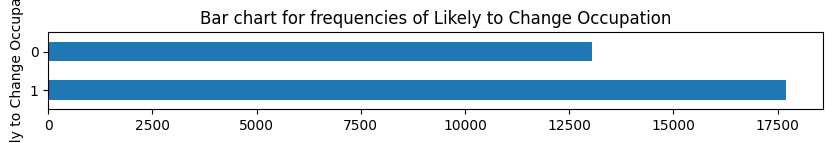

In [110]:
for col in cat_cols:
    freq_table = train_data[col].value_counts()
    plt.figure(figsize = (10,len(freq_table)*0.5)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

##Key Correlations

The box plot below shows that individuals with higher median salaries are less likely to change their jobs compared to those who have lower median salaries.

<ipython-input-220-7e1fb7602b61>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Likely to Change Occupation", y="Salary", data=train_data, palette="coolwarm")


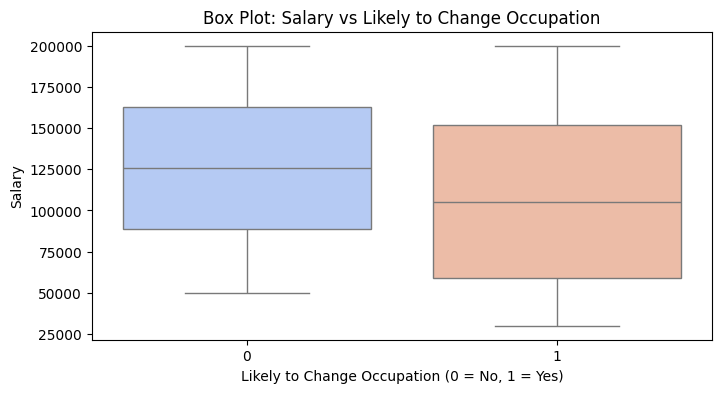

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize Salary vs Likely to Change Occupation
plt.figure(figsize=(8, 4))
sns.boxplot(x="Likely to Change Occupation", y="Salary", data=train_data, palette="coolwarm")
plt.title("Box Plot: Salary vs Likely to Change Occupation")
plt.xlabel("Likely to Change Occupation (0 = No, 1 = Yes)")
plt.ylabel("Salary")
plt.show()

The heatmap below shows that the lower the job satisfaction, the more likely the individual is to change occupation.

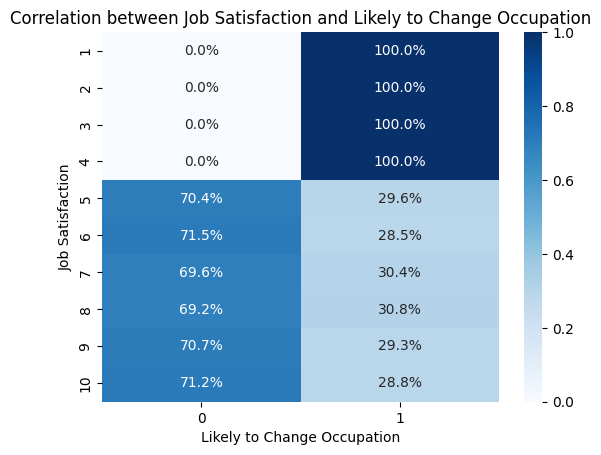

In [111]:
import seaborn as sns

# Create a cross-tabulation
ct = pd.crosstab(data['Job Satisfaction'], data['Likely to Change Occupation'], normalize='index')  # Normalize to show percentages

# Plot the heatmap
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1%')  # Percentage format
plt.title('Correlation between Job Satisfaction and Likely to Change Occupation')
plt.xlabel('Likely to Change Occupation')
plt.ylabel('Job Satisfaction')
plt.show()


The heatmap below shows that job security has a smaller and more uniform impact on decisions to change occupations, with no strong correlation.

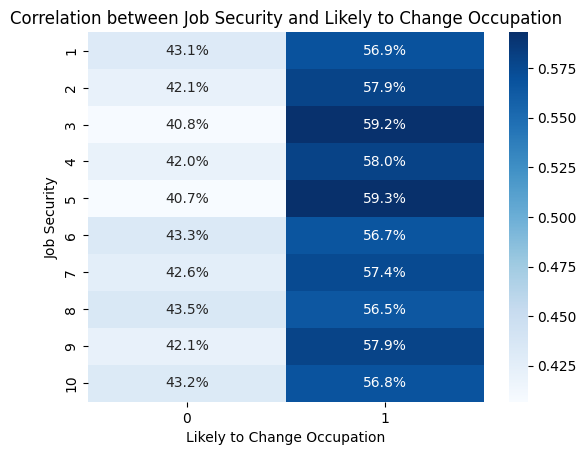

In [112]:
# Create a cross-tabulation
ct = pd.crosstab(data['Job Security'], data['Likely to Change Occupation'], normalize='index')  # Normalize to show percentages

# Plot the heatmap
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1%')  # Percentage format
plt.title('Correlation between Job Security and Likely to Change Occupation')
plt.xlabel('Likely to Change Occupation')
plt.ylabel('Job Security')
plt.show()


The heatmap below shows that industry growth rate also has a smaller and more uniform impact on decisions to change occupations, with no strong correlation.

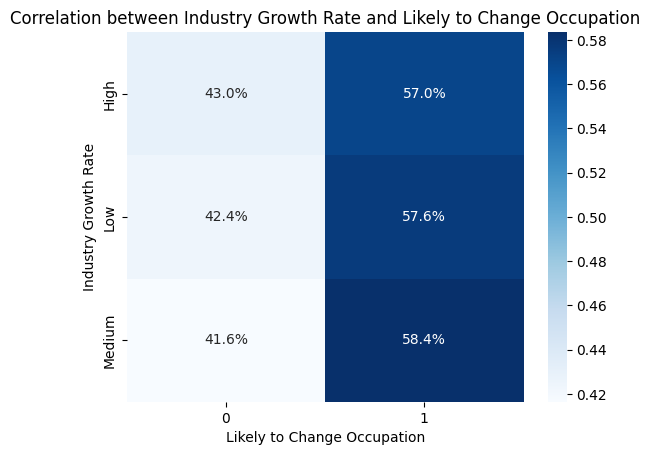

In [208]:
# Create a cross-tabulation
ct = pd.crosstab(data['Industry Growth Rate'], data['Likely to Change Occupation'], normalize='index')  # Normalize to show percentages

# Plot the heatmap
sns.heatmap(ct, annot=True, cmap='Blues', fmt='.1%')  # Percentage format
plt.title('Correlation between Industry Growth Rate and Likely to Change Occupation')
plt.xlabel('Likely to Change Occupation')
plt.ylabel('Industry Growth Rate')
plt.show()


### Data Pipeline


In [180]:
num_cols = [
    "Age",
    "Years of Experience",
    "Job Opportunities",
    "Salary",
    "Career Change Events"
]

cat_cols = [
    "Field of Study",
    "Current Occupation",
    "Gender",
    "Education Level",
    "Industry Growth Rate",
    "Job Satisfaction",
    "Work-Life Balance",
    "Job Security",
    "Career Change Interest",
    "Skills Gap",
    "Family Influence",
    "Mentorship Available",
    "Certifications",
    "Freelancing Experience",
    "Geographic Mobility",
    "Professional Networks",
    "Technology Adoption"
]

all_cols = num_cols + cat_cols

target = 'Likely to Change Occupation'

In [181]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('class', OneHotEncoder(max_categories=8, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

Save the processing pipeline

In [115]:
pipeline_save_path = '/content/drive/MyDrive/IT7103/Project/CareerChangePipeline.pk'

In [116]:
import joblib

joblib.dump(processing_pipeline, pipeline_save_path)

['/content/drive/MyDrive/IT7103/Project/CareerChangePipeline.pk']

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression(max_iter=2000, solver='saga'))
])

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'logistic__penalty' : ['l2', 'l1'],
     'logistic__C': [0.01, 0.1, 1, 10]},
    {'logistic__penalty' : ['elasticnet'],
     'logistic__C': [0.01, 0.1, 1],
     'logistic__l1_ratio' : [0.25, 0.5, 0.75]}
]

grid_search_LR = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='f1', return_train_score=True)

grid_search_LR.fit(train_data, train_data [target])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('logistic',
                                        LogisticRegression(max_iter=2000,
                                                           solver='saga'))]),
             param_grid=[{'logistic__C': [0.01, 0.1, 1, 10],
                          'logistic__penalty': ['l2', 'l1']},
                         {'logistic__C': [0.01, 0.1, 1],
                          'logistic__l1_ratio': [0.25, 0.5, 0.75],
                          'logistic__penalty': ['elasticnet']}],
             return_train_score=True, scoring='f1')

In [117]:
grid_search_LR.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('logistic',
                 LogisticRegression(C=0.1, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [118]:
grid_search_LR.best_score_

0.9103607184123781

In [182]:
lr_f1 = grid_search_LR.score(test_data, test_data[target])
print(lr_f1)

0.8874172185430463


##K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('knn', KNeighborsClassifier())
])

param_grid = [{
  'knn__weights' : ['uniform', 'distance'],
  'knn__n_neighbors' : [3, 5, 7, 10, 20]
}]


grid_search_KNN = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='f1', return_train_score=True)

grid_search_KNN.fit(train_data, train_data[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Change '
                                                                          'Interest',
                                                                          'Skills '
                                                                          'Gap',
                                                                          'Family '
                                                                          'Influence',
                                                                          'Mentorship '
                                                                          'Available',
                                                                          'Certifications',
                                                                          'Freelancing '
                                                                          'Experience',
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [3, 5, 7, 10, 20],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='f1')

In [128]:
grid_search_KNN.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...,
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [129]:
grid_search_KNN.best_score_

0.8494013496810368

In [186]:
knn_f1 = grid_search_KNN.score(test_data, test_data[target])
print(knn_f1)

0.9644830307813733


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = Pipeline([
    ('processing', processing_pipeline),
    ('rfc', RandomForestClassifier())
])

n_features = train_data.shape[1]

param_grid = {
    'rfc__n_estimators' : [10, 30],
    'rfc__max_depth' : [3, 5],
    'rfc__min_samples_split' : [2, 5, 10],
    'rfc__min_samples_leaf' : [2, 5, 10],
    'rfc__max_features' : [n_features//2, n_features//3],
    'rfc__max_leaf_nodes' : [5, 10]
}

grid_search_RF = GridSearchCV(rfc, param_grid, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)


In [38]:
grid_search_RF.fit(train_data,train_data[target])

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Experience',
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [3, 5], 'rfc__max_features': [11, 7],
                         'rfc__max_leaf_nodes': [5, 10],
                         'rfc__min_samples_leaf': [2, 5, 10],
                         'rfc__min_samples_split': [2, 5, 10],
                         'rfc__n_estimators': [10, 30]},
             return_train_score=True, scoring='f1')

In [39]:
grid_search_RF.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('rfc',
                 RandomForestClassifier(max_depth=5, max_features=11,
                                        max_leaf_nodes=10, min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=30))])

In [82]:
grid_search_RF.best_score_

0.950656329069638

In [188]:
rf_f1 = grid_search_RF.score(test_data, test_data[target])
print(rf_f1)

0.9344926155312053


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

train_data_sample, _ = train_test_split(train_data, train_size=0.2, random_state=42)

svc = Pipeline([
    ('processing', processing_pipeline),
    ('svc', SVC())
])

param_grid = [
    {'svc__kernel':['linear'],
     'svc__C' : [0.001, 0.1, 1, 10]},
    {'svc__kernel':['poly'],
     'svc__degree' : [2, 3],
     'svc__coef0' : [0, 1],
     'svc__C' : [0.1, 1, 10, 100]},
    {'svc__kernel':['rbf'],
     'svc__gamma' : [0.01, 0.1, 1, 10],
     'svc__C' : [0.01, 0.1, 1, 10]}
]

grid_search_SVC = GridSearchCV(svc, param_grid, cv=3, scoring='f1', return_train_score=True)
grid_search_SVC.fit(train_data_sample,train_data_sample[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.001, 0.1, 1, 10],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 10, 100], 'svc__coef0': [0, 1],
                          'svc__degree': [2, 3], 'svc__kernel': ['poly']},
                         {'svc__C': [0.01, 0.1, 1, 10],
                          'svc__gamma': [0.01, 0.1, 1, 10],
                          'svc__kernel': ['rbf']}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search_SVC.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Occupation',
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('svc', SVC(C=10, gamma=0.01))])

In [84]:
grid_search_SVC.best_score_

0.9138273708791037

In [190]:
svc_f1 = grid_search_SVC.score(test_data, test_data[target])
print(svc_f1)

0.925430619450091


## Neural Network (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the pipeline
mlp_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('mlp', MLPClassifier(max_iter=1000))
])

# Get the number of input features
n_features = processing_pipeline.fit_transform(train_data).shape[1]

# Optimized hyperparameter grid
param_grid = [{
    'mlp__hidden_layer_sizes': [
        [n_features],                  # Single hidden layer with n_features neurons
        [n_features//2],               # Single hidden layer with n_features/2 neurons
        [n_features*2],                # Single hidden layer with n_features*2 neurons
        [n_features, n_features//2],   # Two hidden layers: n_features and n_features/2 neurons
        [n_features//2, n_features//2] # Two hidden layers: n_features/2 neurons in both
    ],
    'mlp__alpha': [0.001, 0.01, 0.1],
}]

# GridSearchCV
grid_search_MLP = GridSearchCV(
    mlp_pipeline, param_grid, cv=3, scoring='f1', return_train_score=True
)

# Fit the model
grid_search_MLP.fit(train_data, train_data[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Years '
                                                                          'of '
                                                                          'Experience',
                                                                          'Job '
                                                                          'Opportunities',
                                                                          'Salary',
                                                                          'Career '
                                                                          'Change '
                                                                          'Events']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_ca...
                                                                          'Gap',
                                                                          'Family '
                                                                          'Influence',
                                                                          'Mentorship '
                                                                          'Available',
                                                                          'Certifications',
                                                                          'Freelancing '
                                                                          'Experience',
                                                                          'Geographic '
                                                                          'Mobility',
                                                                          'Professional '
                                                                          'Networks',
                                                                          'Technology '
                                                                          'Adoption'])])),
                                       ('mlp', MLPClassifier(max_iter=1000))]),
             param_grid=[{'mlp__alpha': [0.001, 0.01, 0.1],
                          'mlp__hidden_layer_sizes': [[92], [46], [184],
                                                      [92, 46], [46, 46]]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search_MLP.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years of Experience',
                                                   'Job Opportunities',
                                                   'Salary',
                                                   'Career Change Events']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=8),
                                                  ['Field of Study',
                                                   'Current Oc...
                                                   'Gender', 'Education Level',
                                                   'Industry Growth Rate',
                                                   'Job Satisfaction',
                                                   'Work-Life Balance',
                                                   'Job Security',
                                                   'Career Change Interest',
                                                   'Skills Gap',
                                                   'Family Influence',
                                                   'Mentorship Available',
                                                   'Certifications',
                                                   'Freelancing Experience',
                                                   'Geographic Mobility',
                                                   'Professional Networks',
                                                   'Technology Adoption'])])),
                ('mlp',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=[92],
                               max_iter=1000))])

In [134]:
grid_search_MLP.best_score_

0.9221875783650865

In [192]:
mlp_f1 = grid_search_MLP.score(test_data, test_data[target])
print(mlp_f1)

0.9528842910154054


##TabNet

Install pytorch-tabnet library.

In [136]:
!pip install pytorch-tabnet

Filter unnecessary columnns.

In [150]:
train_data, val_data = train_test_split(train_data, test_size = 0.2)

train_data_tabnet = train_data[all_cols + [target]]
val_data_tabnet = val_data[all_cols + [target]]
test_data_tabnet = test_data[all_cols + [target]]

Encode categorical data into ID values.

In [158]:
from sklearn.preprocessing import LabelEncoder

cat_dims =  {}

for col in cat_cols:
    print(col, train_data[col].nunique())
    label_encoder = LabelEncoder()
    train_data_tabnet[col] = label_encoder.fit_transform(train_data[col].values)
    val_data_tabnet[col] = label_encoder.transform(val_data[col].values)
    test_data_tabnet[col] = label_encoder.transform(test_data[col].values)
    cat_dims[col] = len(label_encoder.classes_)

Field of Study 10
Current Occupation 10
Gender 2
Education Level 4
Industry Growth Rate 3
Job Satisfaction 10
Work-Life Balance 10
Job Security 10
Career Change Interest 2
Skills Gap 10
Family Influence 4
Mentorship Available 2
Certifications 2
Freelancing Experience 2
Geographic Mobility 2
Professional Networks 10
Technology Adoption 10


Identify the indices and dimensions of the categorical columns in the dataset.


In [147]:
cat_idxs = [i for i, f in enumerate(all_cols) if f in cat_cols]
cat_dims = [cat_dims[f] for i, f in enumerate(all_cols) if f in cat_cols]

Build TabNet model

In [148]:
n_decisions = 64
n_attentions = 64
n_steps = 5
learning_rate = 0.01

from pytorch_tabnet.tab_model import TabNetClassifier
import torch

tabnet = TabNetClassifier(
    n_d=n_decisions,
    n_a=n_attentions,
    n_steps=n_steps,
    cat_dims=cat_dims,
    cat_emb_dim=cat_dims,
    cat_idxs=cat_idxs,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=learning_rate)
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Train TabNet model

In [160]:
n_epochs = 500
batch_size = 1024
patience = 20

X_train = train_data_tabnet[all_cols].values
y_train = train_data_tabnet[target].values
X_val = val_data_tabnet[all_cols].values
y_val = val_data_tabnet[target].values

tabnet.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    max_epochs=n_epochs,
    patience=patience,
    batch_size=batch_size
)

epoch 0  | loss: 0.73897 | train_auc: 0.65585 | valid_auc: 0.65706 |  0:00:16s
epoch 1  | loss: 0.35039 | train_auc: 0.89112 | valid_auc: 0.88161 |  0:00:34s
epoch 2  | loss: 0.21993 | train_auc: 0.92472 | valid_auc: 0.92022 |  0:00:42s
epoch 3  | loss: 0.14256 | train_auc: 0.9641  | valid_auc: 0.95529 |  0:00:49s
epoch 4  | loss: 0.09186 | train_auc: 0.98037 | valid_auc: 0.97919 |  0:00:58s
epoch 5  | loss: 0.07478 | train_auc: 0.98153 | valid_auc: 0.97866 |  0:01:04s
epoch 6  | loss: 0.04683 | train_auc: 0.97548 | valid_auc: 0.97159 |  0:01:13s
epoch 7  | loss: 0.03824 | train_auc: 0.98453 | valid_auc: 0.98242 |  0:01:19s
epoch 8  | loss: 0.0333  | train_auc: 0.9916  | valid_auc: 0.99028 |  0:01:27s
epoch 9  | loss: 0.0266  | train_auc: 0.99785 | valid_auc: 0.99752 |  0:01:34s
epoch 10 | loss: 0.02271 | train_auc: 0.9985  | valid_auc: 0.99808 |  0:01:43s
epoch 11 | loss: 0.02364 | train_auc: 0.99987 | valid_auc: 0.9998  |  0:01:49s
epoch 12 | loss: 0.01979 | train_auc: 0.99987 | vali

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Predict probabilities for each class label for test data.

In [161]:
test_probs = tabnet.predict_proba(test_data_tabnet[all_cols].values)
test_probs

array([[9.9993384e-01, 6.6147259e-05],
       [1.0865127e-06, 9.9999893e-01],
       [9.9980146e-01, 1.9851649e-04],
       ...,
       [7.8134256e-11, 1.0000000e+00],
       [2.9859557e-05, 9.9997020e-01],
       [9.9984813e-01, 1.5184005e-04]], dtype=float32)

Get id of the label.

In [162]:
import numpy as np

test_pred_id = np.argmax(test_probs, axis=1)
test_pred_id

array([0, 1, 0, ..., 1, 1, 0])

Use the id2label dictionary to get the true labels.

In [163]:
id2label = {idx : label for idx, label in enumerate(tabnet.classes_)}

test_pred_label = np.array(list(map(lambda x: id2label[x], test_pred_id)))
test_pred_label

array([0, 1, 0, ..., 1, 1, 0])

Evaluation for TabNet Model

In [202]:
from sklearn.metrics import f1_score

tabnet_f1 = f1_score(test_data_tabnet[target], test_pred_label, average='weighted')
print(f"Test F1 Score: {tabnet_f1}")


Test F1 Score: 0.9975283351667695


##Models' Performances Comparison

Logistic Regression: F1 Score = 0.8874
K-Nearest Neighbors: F1 Score = 0.9645
Random Forest: F1 Score = 0.9345
Support Vector Classifier: F1 Score = 0.9254
Multi-layer Perceptron: F1 Score = 0.9529
TabNet: F1 Score = 0.9975


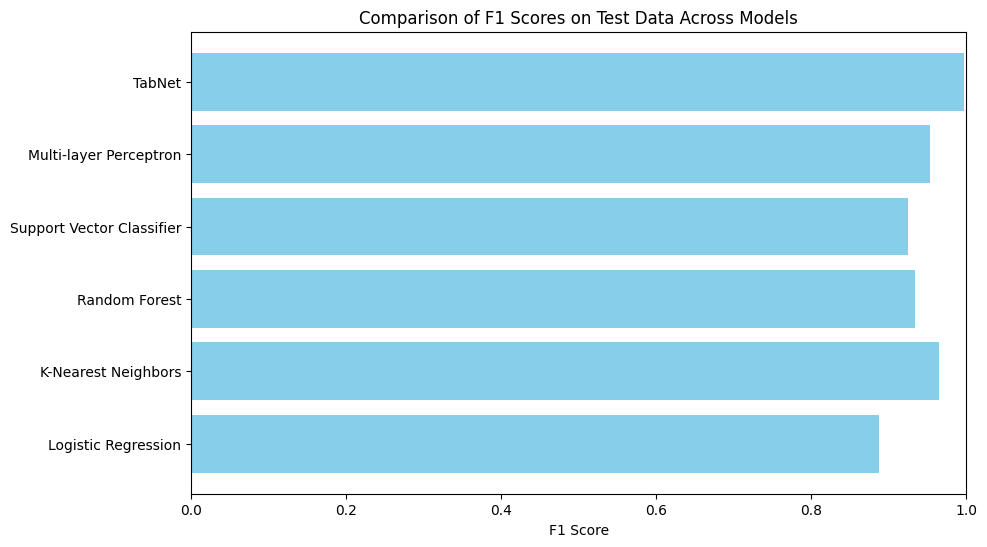

In [203]:
# Create a summary table to compare the F1 scores
model_comparison = {
    'Logistic Regression': lr_f1,
    'K-Nearest Neighbors': knn_f1,
    'Random Forest': rf_f1,
    'Support Vector Classifier': svc_f1,
    'Multi-layer Perceptron': mlp_f1,
    'TabNet': tabnet_f1
}

# Print the F1 scores for all models
for model, score in model_comparison.items():
    print(f'{model}: F1 Score = {score:.4f}')

# Create a bar chart to compare the F1 scores
models = list(model_comparison.keys())
f1_scores = list(model_comparison.values())

plt.figure(figsize=(10, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Comparison of F1 Scores on Test Data Across Models')
plt.xlim(0, 1)  # Set the x-axis limit to [0, 1] for F1 scores
plt.show()
